<a href="https://colab.research.google.com/github/Eddythemachine/classification_coursera/blob/main/Decisoin_Tress_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tan5577/heart-failure-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-failure-dataset' dataset.
Path to dataset files: /kaggle/input/heart-failure-dataset


In [12]:
import os
import shutil

# Define the destination directory
destination_dir = "data"
os.makedirs(destination_dir, exist_ok=True)

# Get the base name of the downloaded dataset directory
dataset_name = os.path.basename(path)

# Define the new path for the dataset
new_dataset_path = os.path.join(destination_dir, dataset_name)

# Copy the downloaded dataset directory to the new location
# shutil.move fails for cross-device links and read-only filesystems.
# shutil.copytree is appropriate here.
shutil.copytree(path, new_dataset_path, dirs_exist_ok=True)

print(f"Dataset copied from '{path}' to '{new_dataset_path}'")

# Update the 'path' variable to the new location for subsequent use
path = new_dataset_path

# List the contents of the new dataset directory
print(f"Contents of '{path}':")
for item in os.listdir(path):
    print(item)

Dataset copied from '/kaggle/input/heart-failure-dataset' to 'data/heart-failure-dataset'
Contents of 'data/heart-failure-dataset':
heart.csv
heart-failure-dataset


In [15]:
df = pd.read_csv("./data/heart-failure-dataset/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.shape

(918, 12)

In [17]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [18]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
for col in df.columns :
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values for column 'Age':
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]


Unique values for column 'Sex':
['M' 'F']


Unique values for column 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']


Unique values for column 'RestingBP':
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]


Unique values for column 'Cholesterol':
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 2

In [21]:
num_std = ["Age", "RestingBP", "Cholesterol", "Oldpeak", "MaxHR"]
ohe_col = ["RestingECG", "ChestPainType", "ST_Slope"]
ord_col = ["ExerciseAngina", "Sex"]

In [22]:
print(df.loc[df.HeartDisease == 1].shape[0])
print(df.loc[df.HeartDisease == 1].shape[0] - 1)

508
507


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Data Transformers
std = StandardScaler()
ohe = OneHotEncoder()
oe = OrdinalEncoder()

In [25]:
preprocessor = ColumnTransformer(
transformers = [
    ("num", std, num_std),
    ("ohe", ohe, ohe_col),
    ("oe", oe, ord_col)
]
)

In [26]:
pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier())
    ]
)

In [27]:
param_grid = {
    "classifier__max_depth" : [5, 10, 20, 50],
    "classifier__min_samples_split" : [2, 5, 100, 1000, 5000],
    "classifier__min_samples_leaf" : [1, 100, 500],
    "classifier__criterion" : ["gini", "entropy"],
    "classifier__splitter" : ["best", "random"],
    "classifier__class_weight" : [None, "balanced"]
}

In [28]:
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


In [30]:
grid = GridSearchCV(pipeline, param_grid, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'Oldpeak',
                                                                          'MaxHR']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['RestingECG',
                                                                          'ChestPainType',
                                                                          'ST_Slope']),
                                                                        ('oe',
                                                                         OrdinalEncoder(),
                                                                         ['ExerciseAngina',
                                                                          'Sex'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, 50],
                         'classifier__min_samples_leaf': [1, 100, 500],
                         'classifier__min_samples_split': [2, 5, 100, 1000,
                                                           5000],
                         'classifier__splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
best_model = grid.best_estimator_
best_params = grid.best_params_
print(best_params)
best_score = grid.best_score_
print(best_score)
best_model

{'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__splitter': 'random'}
0.8542167551952288


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'Oldpeak',
                                                   'MaxHR']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['RestingECG',
                                                   'ChestPainType',
                                                   'ST_Slope']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['ExerciseAngina', 'Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=5,
                                        splitter='random'))])

In [32]:
y_pred = best_model.predict(X_test)

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.8586956521739131


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[66 11]
 [15 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



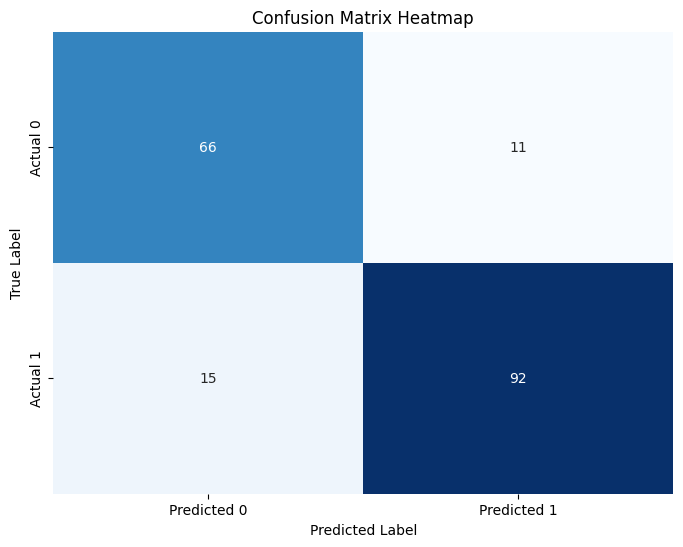

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

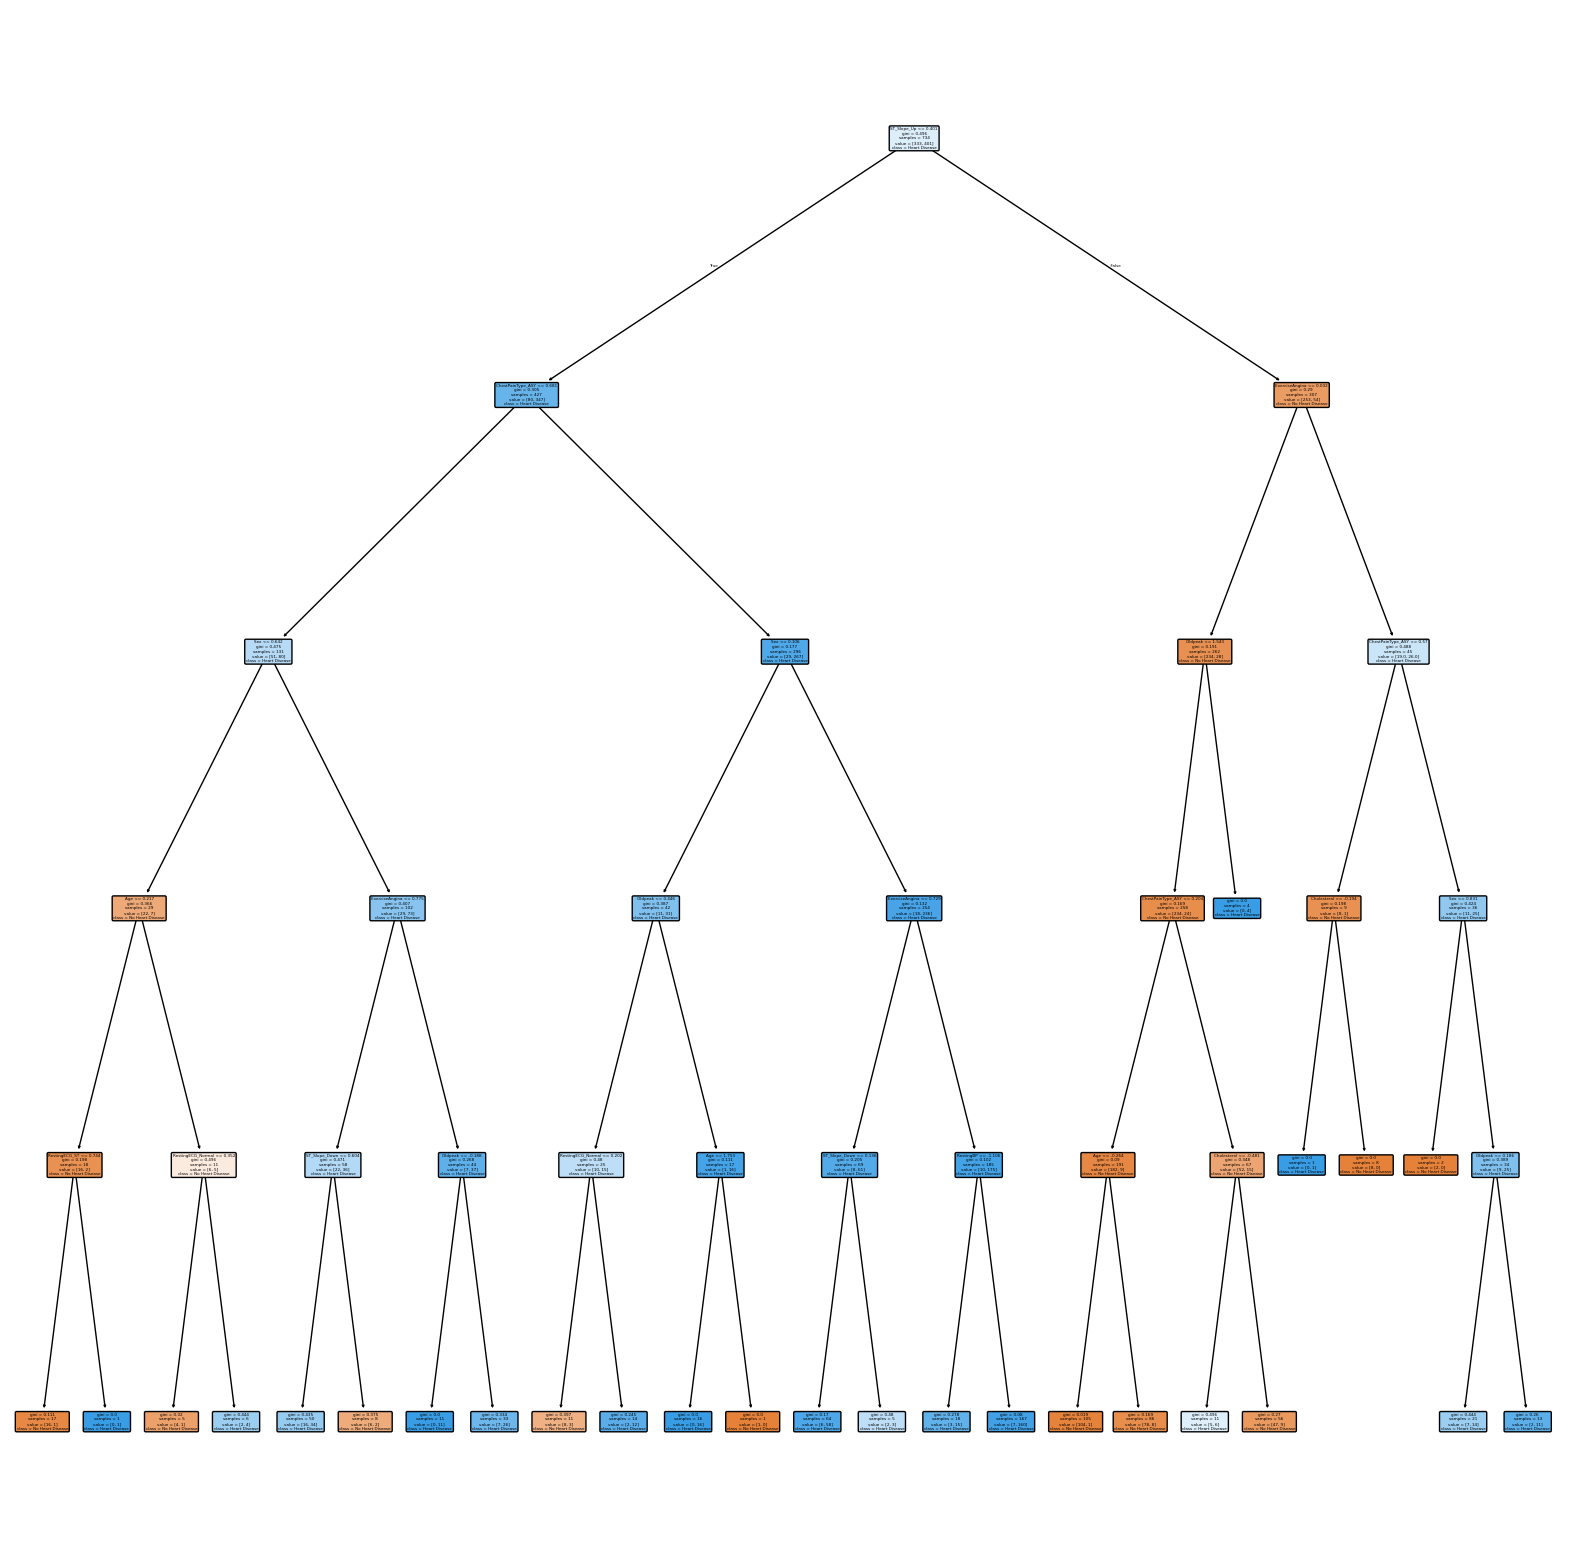

In [39]:
plt.figure(figsize = (20, 20))

# Get the feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_col)

transformed_feature_names = num_std + list(ohe_feature_names) + ord_col

plot_tree(best_model.named_steps['classifier'],
          feature_names=transformed_feature_names,
          class_names=["No Heart Disease", "Heart Disease"],
          filled=True,
          rounded=True)
plt.show()